<a href="https://colab.research.google.com/github/Ravi-shankar100/ZS-Hackathon/blob/main/Hackathon_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## All the necessary installations
!pip install catboost                    #Categorical Boosting 
!pip install xgboost                     #Extra Gradient Boosting
!pip install category_encoders           #Encoding for Categorical Variables

     |████████████████████████████████| 69.2MB 57kB/s 
     |████████████████████████████████| 81kB 6.4MB/s 


In [ ]:
##Importing the Libraries

import pandas as pd          
import numpy as np           
import category_encoders as ce
import datetime as dt         #Handling DateTime variable

##Plotting libraries
import seaborn as sns   
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading the train data
data = pd.read_csv("/content/drive/MyDrive/sentiment_dataset/train_file.csv")

In [ ]:
##Printing the top 5 records in the data
data.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


##Null Values Check

In [ ]:
##There is one column having null values which is Source
data.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [ ]:
##Shape of the data
data.shape

(55932, 11)

In [ ]:
##There are 4754 unique values in the Source column
len(data["Source"].unique())

4754

In [ ]:
##I have used the copy function so that the changes done in final is not reflected in data for preserving the original data
final = data.copy()

#Impute the Null Value

Replacing the null value for Source Column

1.Mode for Categorical column

2.Missing string for the null value

3.Backward Fill(bfill) for the null value

4.Forward Fill(ffill) for the null value

Methods 1 and 2 have given the same performance and 3,4 given a little decline in the score values so ignored those 2 approaches

In [ ]:
## Handling the Source Column
mode_for_Source = final["Source"].mode()[0]             ##Compute the mode value

## Imputing the Missing value in the Source column
final["Source"].fillna(mode_for_Source,inplace = True)  ##Mode 
'''
final["Source"].fillna("Missing",inplace=True)          ##Missing
final.ffill(axis="rows",inplace=True)                   ##Forward Fill
final.bfill(axis="rows",inplace=True)                   ##Backward Fill
'''

'\nfinal["Source"].fillna("Missing",inplace=True)          ##Missing\nfinal.ffill(axis="rows",inplace=True)                   ##Forward Fill\nfinal.bfill(axis="rows",inplace=True)                   ##Backward Fill\n'

In [ ]:
final.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
Facebook             0
GooglePlus           0
LinkedIn             0
SentimentTitle       0
SentimentHeadline    0
dtype: int64

In [ ]:
final.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


##EDA

This step is very much necessary to understand more about the data and we can also make statistical conclusions from different plots of the data

Analysis of all the plots is explained below the plots

In [ ]:
y = final[["SentimentTitle","SentimentHeadline"]]
y.head()

final.drop(["SentimentTitle","SentimentHeadline"],axis=1,inplace=True)

[Text(0, 0, 'IDLink'),
 Text(0, 0, 'Title'),
 Text(0, 0, 'Headline'),
 Text(0, 0, 'Source'),
 Text(0, 0, 'Topic'),
 Text(0, 0, 'PublishDate'),
 Text(0, 0, 'Facebook'),
 Text(0, 0, 'GooglePlus'),
 Text(0, 0, 'LinkedIn'),
 Text(0, 0, 'datetime'),
 Text(0, 0, 'year')]

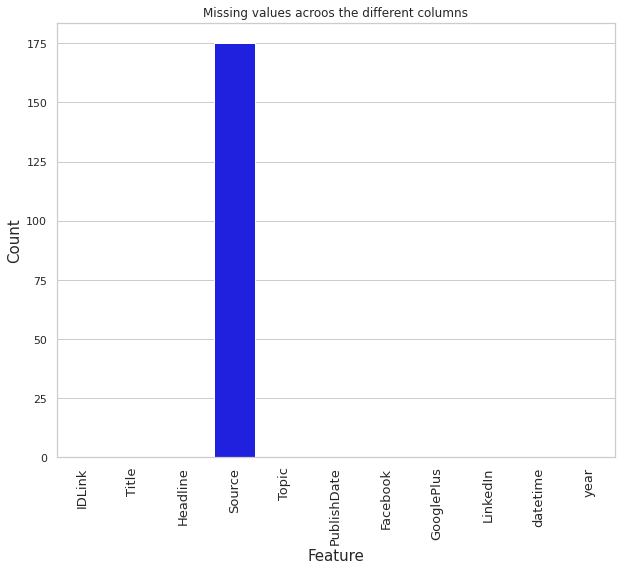

In [ ]:
##Null values using barplot
null_values = final.isnull().sum()
null_values = pd.DataFrame({'Feature': null_values.index,'Count':null_values.values})

plt.figure(figsize=(10,8))
g = sns.barplot(x="Feature",y="Count",data=null_values,color="blue")
g.set_title("Missing values across the different columns")
g.set_xlabel("Feature",fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


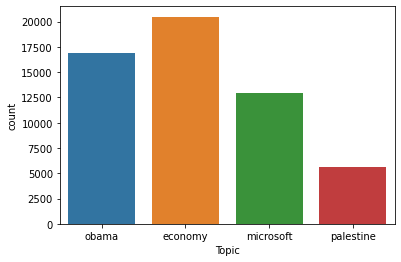

In [ ]:
sns.countplot("Topic", data= final)

This plot gives us the count of the 4 categories in the Topic column

Here we can say that 

News related to economy is more 

News related to palestine is less

As this is not a classification problem there is no imbalanced data issues

Plotting for the Source column is possible but as it has 4754 unique values in it if we plot also it is difficult to interpret the plot

In [ ]:
def scatterplot(i,x,y):
  plt.subplot(1,3,i)
  plt.scatter(x,y,data=final)
  plt.xlabel(x)
  plt.ylabel(y)

In [ ]:
plt.figure(figsize=(18,8))
scatterplot(1,"Facebook","SentimentTitle")
scatterplot(2,"LinkedIn","SentimentTitle")
scatterplot(3,"GooglePlus","SentimentTitle")

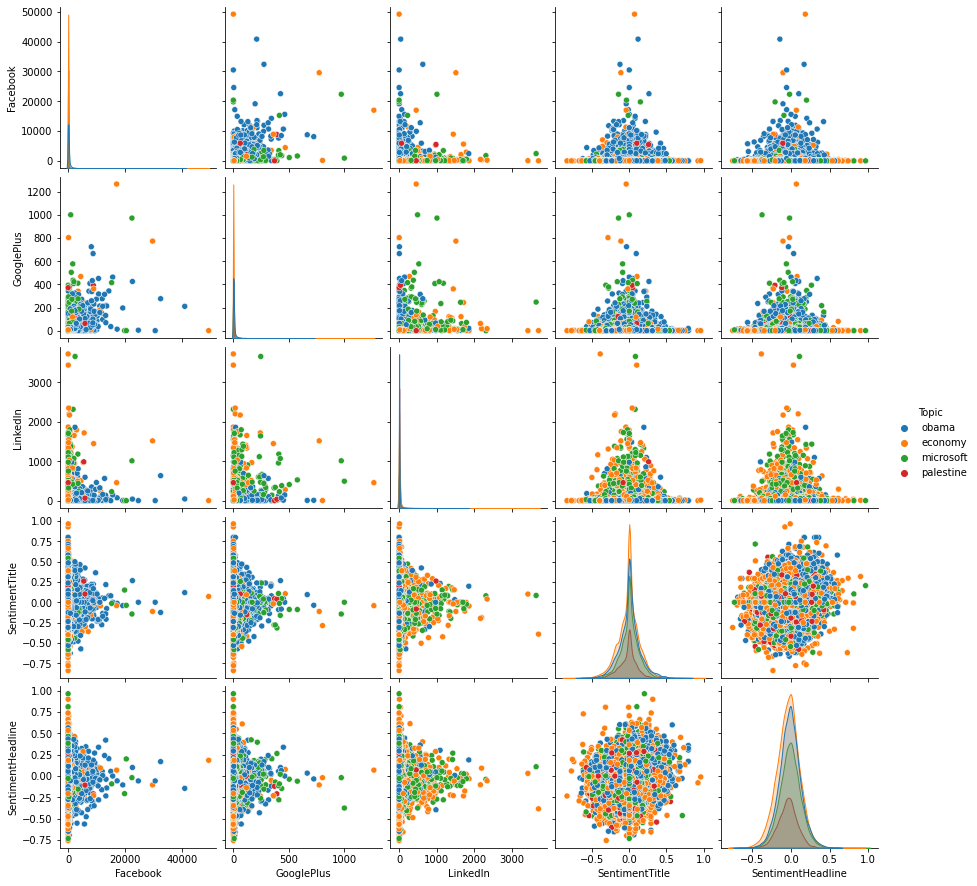

In [ ]:
sns.pairplot(final,hue="Topic")

From this above plot we have 

1.Density Curve of the Features

2.Different Scatter Plot for features with respect to x and y axis 

From the Density Plot of Facebook , LinkedIn and GooglePlus we can say that they are not normally distributed and we can say from the scatter plots that there is no linear relationship and no strong coorelation to the target variable from any of the independent variable but the 2 target variables are normally distributed and Linear based Machine learning algorithms are not suitable for this type of data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


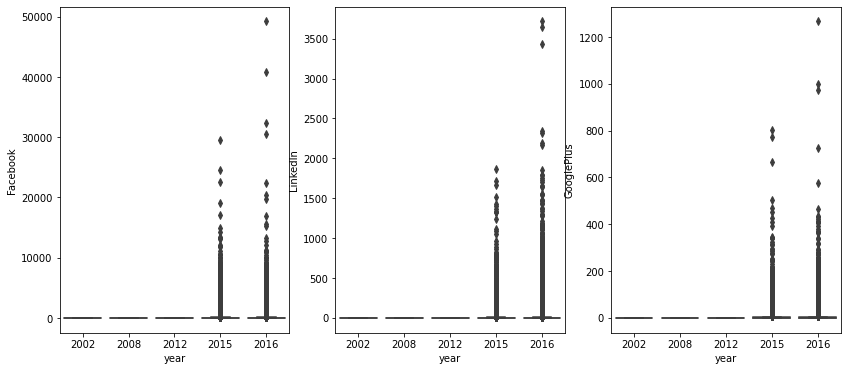

In [ ]:
##Box Plots
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot('year','Facebook',data = final)

plt.subplot(1,3,2)
sns.boxplot('year','LinkedIn',data = final)

plt.subplot(1,3,3)
sns.boxplot('year','GooglePlus',data = final)

This is the box plot for the Topic with respect to Social Media features such as Facebook , LinkedIn and GooglePlus

From the these plots we can say that there are more outliers in these columns and all are skewed distributions and Palestine has less outliers compared to others and it also has less occurences in the dataset 

##Encoding the Source Categorical Column

Used encoding methods for the source column as any Machine Learning algorithm requires data to be in numeric format

1.Frequency Encoding

2.Binary Encoding

3.Obtaining the Top 10 Features of this column

1.It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat to the target variable, it helps the model understand and assign the weight in direct and inverse proportion, depending on the nature of the data 

2.Binary encoding returns log(base2)^n features and here I have 4754 labels it results to 13 features which actually reduced score.This also leads to curse of dimensionality. So I ignored this approach.

3.This is a good technique where I obtain top 10 labels of this column and apply one hot encoding for these labels ignoring the other and this is a widely used technique for high cardinality of lables in a feature and it was introduced in KDD Cup Orange Challenge and this also gave me same score like Frequency Encoding so I ignored this approach

In [ ]:
import category_encoders as ce1

In [ ]:
##Handling the Source Column

##Encoding with the Frequency encoding for Source Variable
fe = final.groupby("Source").size()/len(final)
final.loc[:,"Source_encode_fe"] = final["Source"].map(fe)

'''
##Encoding with the Binary Encoding
encoding = ce1.BinaryEncoder(cols="Source")
df = encoding.fit_transform(final["Source"])

##One Hot Encoding for the Top 10 Labels
top_10_labels = final["Source"].value_counts().sort_values(ascending=False).head(10).index
print(top_10_labels)

for label in top_10_labels:
  final[label] = np.where(final['Source'] == label,1,0)
'''

'\n##Encoding with the Binary Encoding\nencoding = ce1.BinaryEncoder(cols="Source")\ndf = encoding.fit_transform(final["Source"])\n\n##One Hot Encoding for the Top 10 Labels\ntop_10_labels = final["Source"].value_counts().sort_values(ascending=False).head(10).index\nprint(top_10_labels)\n\nfor label in top_10_labels:\n  final[label] = np.where(final[\'Source\'] == label,1,0)\n'

##Handling Date time column

I extracted the year from datetime column and ignored the month and day as its contribution is less towards target variable and reduced the final score and I also observed a reccurence relation in these two columns and not contributing to target variable. So I ignored those 2 columns

In [ ]:
##Handling the Datetime Column

final["datetime"] = pd.to_datetime(final["PublishDate"])
final["year"] = final["datetime"].dt.year

In [ ]:
final.groupby(["Topic","year"]).agg({"GooglePlus":max})

GooglePlus
Topic     year            
economy   2008          -1
          2012          -1
          2015         804
          2016        1267
microsoft 2015         504
          2016        1001
obama     2002          -1
          2015         666
          2016         725
palestine 2015         207
          2016         392

In [ ]:
final.groupby(["Topic","year"]).agg({"LinkedIn":max})

LinkedIn
Topic     year          
economy   2008        -1
          2012        -1
          2015      1864
          2016      3716
microsoft 2015      1665
          2016      3652
obama     2002        -1
          2015      1093
          2016      1858
palestine 2015        89
          2016       983

In [ ]:
final.groupby(["Topic","year"]).agg({"Facebook":max})

Facebook
Topic     year          
economy   2008        -1
          2012        -1
          2015     29564
          2016     49211
microsoft 2015      1788
          2016     22346
obama     2002        -1
          2015     24594
          2016     40836
palestine 2015      7277
          2016      8840

In [ ]:
final["Headline"][(final["Facebook"] == 22346) & (final["Topic"] == "microsoft") & (final["year"] == 2016)].iloc[0]

"Developers at Microsoft created 'Tay', an AI modelled to speak 'like a teen girl', in order to improve the customer service on their voice"

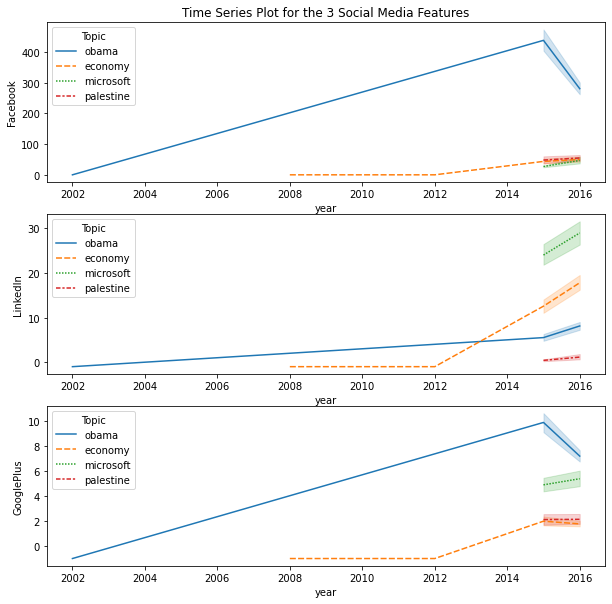

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.title("Time Series Plot for the 3 Social Media Features")
sns.lineplot(x="year",y="Facebook",hue="Topic",style="Topic",data=final)

plt.subplot(3,1,2)
sns.lineplot(x="year",y="LinkedIn",hue="Topic",style="Topic",data=final)

plt.subplot(3,1,3)
sns.lineplot(x="year",y="GooglePlus",hue="Topic",style="Topic",data=final)

In [ ]:
final.groupby(["Topic","year"])["Facebook"].mean()

Topic      year
economy    2008     -1.000000
           2012     -1.000000
           2015     42.825634
           2016     49.114775
microsoft  2015     26.205533
           2016     45.968372
obama      2002     -1.000000
           2015    438.567544
           2016    280.551534
palestine  2015     47.197080
           2016     54.044625
Name: Facebook, dtype: float64

In [ ]:
final.groupby(["Topic","year"]).agg({"Facebook":max})

Facebook
Topic     year          
economy   2008        -1
          2012        -1
          2015     29564
          2016     49211
microsoft 2015      1788
          2016     22346
obama     2002        -1
          2015     24594
          2016     40836
palestine 2015      7277
          2016      8840

In [ ]:
final["Headline"][(final["Facebook"] == 22346) & (final["Topic"] == "microsoft") & (final["year"] == 2016)].iloc[0]

"Developers at Microsoft created 'Tay', an AI modelled to speak 'like a teen girl', in order to improve the customer service on their voice"

In [ ]:
final["Headline"][(final["LinkedIn"] == 3652) & (final["Topic"] == "microsoft") & (final["year"] == 2016)].iloc[0]

'REDMOND, Wash. """ Taking a page from Jules Verne, researchers at Microsoft believe the future of data centers may be under the sea.'

In [ ]:
final["Headline"][(final["GooglePlus"] == 1001) & (final["Topic"] == "microsoft") & (final["year"] == 2016)].iloc[0]

'For decades, this massive market has been dominated by two players, Apple and Microsoft. Before 2012, Google was a non-entity in the market'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


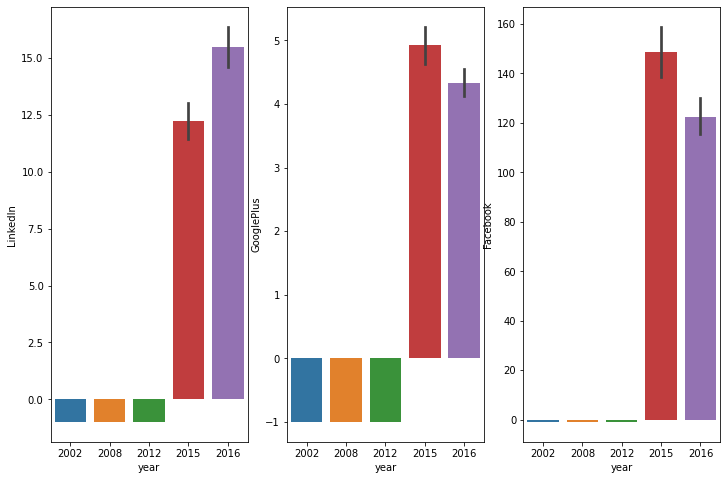

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.barplot("year","LinkedIn",data=final)

plt.subplot(1,3,2)
sns.barplot("year","GooglePlus",data=final)

plt.subplot(1,3,3)
sns.barplot("year","Facebook",data=final)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

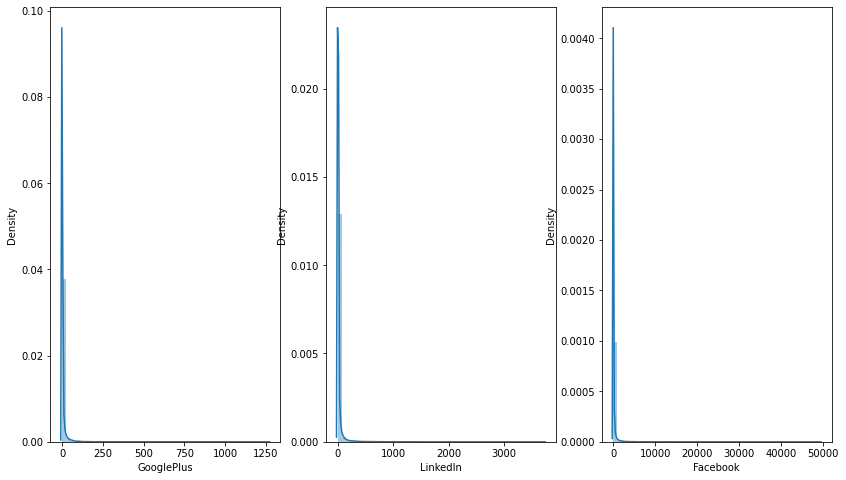

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.distplot(final["GooglePlus"],kde=True)
plt.subplot(1,3,2)
sns.distplot(final["LinkedIn"],kde=True)
plt.subplot(1,3,3)
sns.distplot(final["Facebook"],kde=True)

From these plots I can say that the three social media variables doesn't have normal distribution and all are right skewed distributions and Linear based ML Algorithms cannot be used for this type of data 

In [ ]:
final.describe()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
count,55932.000000,55932.000000,55932.000000,55932.000000,55932.000000
mean,132.050329,4.551616,14.300132,-0.006318,-0.029577
std,722.931314,21.137177,76.651420,0.137569,0.143038
min,-1.000000,-1.000000,-1.000000,-0.838525,-0.755355
25%,0.000000,0.000000,0.000000,-0.079057,-0.116927
50%,6.000000,0.000000,0.000000,0.000000,-0.027277
75%,37.000000,2.000000,4.000000,0.063969,0.057354
max,49211.000000,1267.000000,3716.000000,0.962354,0.964646


From the above plot we can say that news on these 4 topics obama,economy,palestine,microsoft on different years in 3 social media platforms


1.In LinkedIn platform News on these topics has less popularity in initial 3 years and highest popularity in 2016

2.In GooglePlus platform News on these topics has less popularity in initial 3 years and highest popularity in 2015

3.In Facebook platform News on these topics doesnt have negative score compared to others and popularity increased on the year 2015 


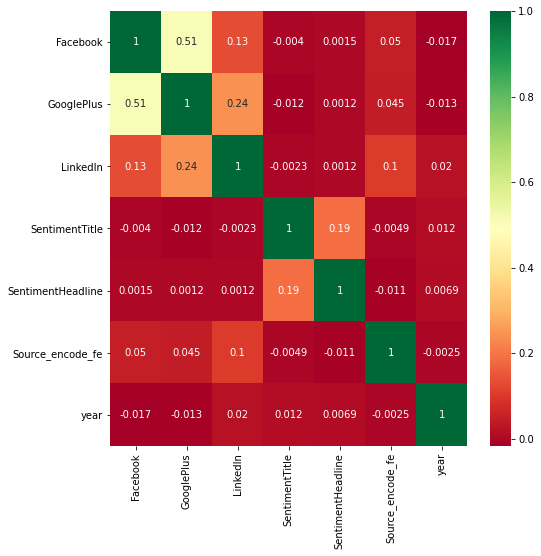

In [ ]:
## Coorelation plot for the variables
plt.figure(figsize=(8,8))
sns.heatmap(final.corr(),annot=True,cmap="RdYlGn")

In [ ]:
##The coorelation for the variables excluding Title and Headline
final.corr()

,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Source_encode_fe,year
Facebook,1.000000,0.508933,0.132728,-0.003951,0.001465,0.050076,-0.017284
GooglePlus,0.508933,1.000000,0.244457,-0.011716,0.001181,0.045471,-0.013146
LinkedIn,0.132728,0.244457,1.000000,-0.002330,0.001248,0.102862,0.020454
SentimentTitle,-0.003951,-0.011716,-0.002330,1.000000,0.185584,-0.004934,0.011635
SentimentHeadline,0.001465,0.001181,0.001248,0.185584,1.000000,-0.011205,0.006896
Source_encode_fe,0.050076,0.045471,0.102862,-0.004934,-0.011205,1.000000,-0.002523
year,-0.017284,-0.013146,0.020454,0.011635,0.006896,-0.002523,1.000000


From the above coorelation plot we can say that none of the variable is strongly coorelated to the Sentiment Title and Sentiment Headline variable which are Target Variables

None of the variable is atleast 50% coorelated to the target variables and Sentiment Title is having better contribution to Sentiment Headline compared to the independent variables

Also except the year column all are negatively coorelated to Sentiment Title variable

Except Source_code_fe variable all are positvely coorelated to Sentiment Headline variable


In [ ]:
##Adding the Sentiment Title and Sentiment Headline column to y dataframe
y = pd.DataFrame({"SentimentTitle":final["SentimentTitle"],"SentimentHeadline":final["SentimentHeadline"]})

##Handling the Topic Column

As this column only has 4 labels namely economy , obama , palestine , microsoft

I applied One Hot encoding and removed one column so there is no dependency which means I avoided the Dummy variable trap and it is also a good practice to remove the dependencies in the dataset and for this column one hot encoding is the best technique as it not the ordinal data and equal importance is give to each category and also have only 4 categories

In [ ]:
##One hot Encoding for the variable Topic
df = pd.get_dummies(final["Topic"],columns=["Topic"],prefix="Topics",drop_first = True)
final = pd.concat([final,df],axis=1)

In [ ]:
final.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'Facebook', 'GooglePlus', 'LinkedIn', 'SentimentTitle',
       'SentimentHeadline', 'Source_encode_fe', 'Bloomberg', 'Reuters',
       'ABC News', 'New York Times', 'The Guardian', 'Business Insider',
       'Forbes', 'Economic Times', 'CNN', 'WinBeta', 'datetime', 'year',
       'Topics_microsoft', 'Topics_obama', 'Topics_palestine'],
      dtype='object')

##Handling the Title and Headline column

As these are two main columns which talk about the title and headline of the news and for encoding these columns I have used 

-Hash encoding

Hashing is where we perform the Hashing operation i.e we generate the hash value for an input.
It is best technique and also powerful technique which is widely used when cardinality of categories is high and here we have the flexibilty of choosing the no of columns to represent the data.

Ex: We can represent feature with 100 categories using N features where N is of our choice it can be even 1 also

-Word2Vec

Initially I used NLP technique such as Word2Vec for handling these 2 columns.This actually can obtain the semantic information but this actually lead to a dimensional error compared to other columns. So ignored this approach


In [ ]:
title = pd.DataFrame({"Title":final["Title"],"Headline":final["Headline"]})

In [ ]:
##Hash Encoding for the variable 
##Handling the Title and Headline Column

import category_encoders as ce
encoder = ce.HashingEncoder(cols=["Title","Headline"],n_components= 20)
title = encoder.fit_transform(title)

#Representing the Title and Headline columns using 20 features
final = pd.concat([final,title],axis = 1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
##First five rows of the y DataFrame
y.head()

,SentimentTitle,SentimentHeadline
0,0.000000,-0.053300
1,0.208333,-0.156386
2,-0.425210,0.139754
3,0.000000,0.026064
4,0.000000,0.141084


##Handling the Social media columns
Facebook,LinkedIn and GooglePlus

These mainly represent the effect of the news in that particular platform and I have applied a transformation such as Relu Activation function

When value is less than 1 make it as 0 and greater than 1 then keep it same and this Relu is very much used in Deep Learning and also faster and this also makes all negative values to 0

if x < 1:
  x = 0

else:
  x

But this method made a little decline in the score so I have ignored it

In [ ]:
'''
##Handling the Social Media Columns
final["Facebook"] = final["Facebook"].apply(lambda x : 0 if x < 0 else x)
final["GooglePlus"] = final["GooglePlus"].apply(lambda x : 0 if x < 0 else x)
final["LinkedIn"] = final["LinkedIn"].apply(lambda x : 0 if x < 0 else x)
'''

In [ ]:
##Removing the columns after transformations applied to them
final.drop(["IDLink","Source","PublishDate","datetime","Topic","Title","Headline"],axis=1,inplace=True)

In [ ]:
final.drop(["SentimentTitle","SentimentHeadline"],axis=1,inplace=True)

In [ ]:
#All the columns from col_1 to col_19 are hash encoded columns for Title and Headline
final.columns

Index(['Facebook', 'GooglePlus', 'LinkedIn', 'Source_encode_fe', 'year',
       'Topics_microsoft', 'Topics_obama', 'Topics_palestine', 'col_0',
       'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19'],
      dtype='object')

In [ ]:
final.shape

I didnt perform Feature Selection as the No of Columns in this data is 11 and some of the columns are categorical and one is datetime

##CatBoost Regressor

I have used the CatBoost Regressor and I created 2 models as I have two output variables and we can say that Title and Headline are related to each other. Headline is nothing but more description of the Title

So initially I created a model for Sentiment Title and

For the 2nd Model I have added the Sentiment Title column also for creating model for Sentiment Headline variable as Sentiment Title is contributing more to the Sentiment Headline compared to independent variables and this is known from coorelation so adding this column increased score

In [ ]:
from catboost import CatBoostRegressor

ctb = CatBoostRegressor(iterations=2000)
ctb.fit(final,y["SentimentTitle"])

In [ ]:
## I have used iterations as 2000 as the final value but initially used the default value and increased to 1000 , 1500 , 2000 and 2,500
## When it is 2,500 there is overfitting issue so I have reduced it back to 2,000 as it gave best score compared to other scores


from catboost import CatBoostRegressor

ctb = CatBoostRegressor(iterations=2000)
ctb.fit(final,y["SentimentTitle"])

final["SentimentTitle"] = y["SentimentTitle"]

ctb1 = CatBoostRegressor(iterations=2000)
ctb1.fit(final,y["SentimentHeadline"])

In [ ]:
#Here I have added the Sentiment Title column for the 2nd model
final["SentimentTitle"] = y["SentimentTitle"]

In [ ]:
ctb1 = CatBoostRegressor(iterations=2000)
ctb1.fit(final,y["SentimentHeadline"])

In [ ]:
final.drop("SentimentTitle",axis=1,inplace=True)

##XGBoost

I have also used the XGBoost in the same manner and this gave a decline in the score compared to CatBoost Regressor for different values of estiamtors.So I have ignored this approach

##Test Data

All the Feature Engineering done on the Train data has been done for the test data in the same order so that there will be no feature mismatch while forming the final test set

In [ ]:
#Reading the test data
test_data = pd.read_csv("/content/drive/MyDrive/sentiment_dataset/test_file.csv")

In [ ]:
##This is stored for the future use
IDLink = test_data["IDLink"]

In [ ]:
##Handling the Source Column

##Impute null value using the mode of the Source column
mode1 = test_data["Source"].mode()[0]
test_data["Source"] = test_data["Source"].fillna(mode1)


##Encoding with the Frequency encoding for Source Variable
fe1 = test_data.groupby("Source").size()/len(test_data)
test_data.loc[:,"Source_encode_fe"] = test_data["Source"].map(fe1)

In [ ]:
##Handling the Datetime column

test_data["datetime"] = pd.to_datetime(test_data["PublishDate"])

test_data["year"] = test_data["datetime"].dt.year

In [ ]:
##Handling the Topic column

df1 = pd.get_dummies(test_data["Topic"],columns=["Topic"],prefix="Topics",drop_first = True)
test_data = pd.concat([test_data,df1],axis=1)

In [ ]:
##Handling the Title and Headline column

title1 = pd.DataFrame({"Title":test_data["Title"],"Headline":test_data["Headline"]})
title1 = encoder.transform(title1)
test_data = pd.concat([test_data,title1],axis=1)

In [ ]:
##Dropping the unnecessary columns
test_data.drop(["IDLink","Source","PublishDate","datetime","Topic","Title","Headline"],axis=1,inplace=True)

This is same transformation done in the training set as this has little decline in the performance I have ignored it and this I thought of making it as Relu and even in ANN this is used. Here I wanted to make negative values to 0 and positive to same values so there will be no negative values

In [ ]:
'''
test_data["Facebook"] = test_data["Facebook"].apply(lambda x : 0 if x < 1 else x)
test_data["GooglePlus"] = test_data["GooglePlus"].apply(lambda x : 0 if x < 1 else x)
test_data["LinkedIn"] = test_data["LinkedIn"].apply(lambda x : 0 if x < 1 else x)
'''

In [ ]:
test_data.head()

,Facebook,GooglePlus,LinkedIn,Source_encode_fe,year,Topics_microsoft,Topics_obama,Topics_palestine,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0,0,1,0.000429,2016,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,121,2,13,0.006570,2016,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12,1,0,0.000080,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,0,0,3,0.002414,2016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,3,0,0,0.001234,2016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.shape

(37288, 28)

##Prediction for the Test Data

In [ ]:
title_predict = ctb.predict(test_data)

Displaying the pediction for first 5 records

In [ ]:
title_predict[0:5]

array([-0.02734718,  0.00011355,  0.01141025,  0.00604574, -0.01273348])

In [ ]:
##Here I am adding the predicted Sentiment Title column to the data as it has more contribution to the Sentiment Headline and very much useful for prediction
test_data["SentimentTitle"] = title_predict

In [ ]:
headlines_predict = ctb1.predict(test_data)

In [ ]:
headlines_predict[0:5]

array([-8.47971931e-02,  4.87328967e-05, -1.00298989e-02, -4.74353864e-02,
       -3.95897767e-02])

In [ ]:
test_data.drop("SentimentTitle",axis=1,inplace=True)

In [ ]:
##Submission using the CatBoost Regressor
submit= pd.DataFrame(columns=["IDLink","SentimentTitle","SentimentHeadline"])
submit["IDLink"] = IDLink
submit["SentimentTitle"] = title_predict
submit["SentimentHeadline"] = headlines_predict
submit.to_csv("sample_submission_catboost.csv",index=False)

##ANN

I have used the Artificial Neural Networks as the data consists of 55,932 rows

It also gives better score when we have more data

Finds the useful features in the dataset and can find the complex patterns in the dataset and give better results.

It is very much powerful technique and used widely in many real world scenarios

In [ ]:
#Importing the libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
## These two data frames are used for the ANN train,test and used .copy() so that these changes wont get reflected back 
ann_train = final.copy()
ann_test = test_data.copy()

##Scaling the data

The main step before giving the data to the ANN we have to scale the data so that the model won't be unstable and there will be learning and no instable gradients and training also will be faster

I have scaled the data using MinMaxScaler which is nothing but normalising the data where min value is 0 and max value is 1 by default and I have used max value to be 2 as my Hash encoded columns has max value to be 2 so I scaled other columns in this manner

Reason for using MinMaxScaler is that Standard Scaler is generally used when we have data as Normal and here we have seen from the above plots that it is Non-Normal and generally in ANN we use MinMaxScaler when data is Non-Normal 

In [ ]:
##Scaling the Training Data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

f1 = MinMaxScaler(feature_range=(0,2))
ann_train["Facebook"] = f1.fit_transform(np.array(ann_train["Facebook"]).reshape(-1,1))

g1 = MinMaxScaler(feature_range=(0,2))
ann_train["GooglePlus"] = g1.fit_transform(np.array(ann_train["GooglePlus"]).reshape(-1,1))

l1 = MinMaxScaler(feature_range=(0,2))
ann_train["LinkedIn"] = l1.fit_transform(np.array(ann_train["LinkedIn"]).reshape(-1,1))

y1 = MinMaxScaler(feature_range=(0,2))
ann_train["year"] = y1.fit_transform(np.array(ann_train["year"]).reshape(-1,1))

In [ ]:
##Scaling the Test Data using MinMaxScaler

ann_test["Facebook"] = f1.transform(np.array(ann_test["Facebook"]).reshape(-1,1))
ann_test["GooglePlus"] = g1.transform(np.array(ann_test["GooglePlus"]).reshape(-1,1))
ann_test["LinkedIn"] = l1.transform(np.array(ann_test["LinkedIn"]).reshape(-1,1))
ann_test["year"] = y1.transform(np.array(ann_test["year"]).reshape(-1,1))

In [ ]:
##Train Data after normalisation
ann_train.head()

,Facebook,GooglePlus,LinkedIn,Source_encode_fe,year,Topics_microsoft,Topics_obama,Topics_palestine,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0.0,0.0,0.0,0.005882,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.020865,0.857143,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.020865,1.428571,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.000393,1.857143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.0,0.0,0.0,0.000375,1.857143,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
##Test Data after normalisation
ann_test.head()

,Facebook,GooglePlus,LinkedIn,Source_encode_fe,year,Topics_microsoft,Topics_obama,Topics_palestine,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
0,0.000041,0.001577,0.001076,0.000429,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.004958,0.004732,0.007533,0.006570,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.000528,0.003155,0.000538,0.000080,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,0.000041,0.001577,0.002152,0.002414,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.000163,0.001577,0.000538,0.001234,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


##ANN Model

This consists of 3 layers

Layer 1 has 10 neurons 

Layer 2 has 20 neurons

Layer 3 has 30 neurons

The kernel initialization I have used is the He_initialiser and activation is Relu and generally this initialiser works well with Relu so I have used this for achieving better score 

Relu is Non linear activation function and it is fast and used in many of the Neural Networks. So I have used this function

Optimizer used is Adam and Loss is MSE

Adam is very powerful method and it has faster convergence compared to other optimization algorithms and it is combination of AdaGrad and RMSProp

I have defined a function here as both models have same architecture and by calling this functon by sending their respective objects as parameters I am buliding the neural network

In [ ]:
##ANN Model
def model(regressor,dim):
  regressor.add(Dense(10,kernel_initializer='he_uniform',activation="relu",input_dim = dim))
  regressor.add(Dense(20,kernel_initializer='he_uniform',activation="relu"))
  regressor.add(Dense(30,kernel_initializer='he_uniform',activation="relu"))
  regressor.add(Dense(1))

  regressor.compile(optimizer="adam",loss="mse")
  return regressor

In [ ]:
##Creating the 1st Sequential model
regressor = Sequential()
regressor = model(regressor,ann_train.shape[1])         #Here I am not sending Sentiment Title column so dimensions is 28 same as the originals
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                290       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


Epochs used is 20 and I have tried for other values such as 10 and 30 when I used 10 it is underfitting and for 30 it is overfitting so for 20 these both cases are avoided and validation split as 0.2

In [ ]:
#Fit the data
model_history = regressor.fit(ann_train,y["SentimentTitle"],epochs=20,validation_split=0.2)

In [ ]:
##Prediction for the Sentiment Title Data
title_pred = regressor.predict(ann_test)

In [ ]:
title_pred[0:5]

array([[-0.01537554],
       [-0.00896826],
       [-0.00975219],
       [-0.01307545],
       [-0.01085053]], dtype=float32)

In [ ]:
##Creating the 2nd Sequential Model
regressor1 = Sequential()
regressor1 = model(regressor1,ann_train.shape[1])   #Here I am sending the Sentiment Title feature so the dimension is 29
regressor1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 1,181
Trainable params: 1,181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Here I am adding the Sentiment Title Column for 2nd Model
ann_train_add = ann_train.copy()
ann_train_add["SentimentTitle"] = y["SentimentTitle"]

In [ ]:
##Fit the data
model_history1 = regressor1.fit(ann_train_add,y["SentimentHeadline"],epochs=20,validation_split=0.2)

In [ ]:
ann_test_add = ann_test.copy()
ann_test_add["SentimentTitle"] = title_pred

In [ ]:
#Sentiment Headline Prediction 
headline_pred = regressor1.predict(ann_test_add)

Displaying the prediction for first 5 records

In [ ]:
title_pred[0:5]

array([[-0.01537554],
       [-0.00896826],
       [-0.00975219],
       [-0.01307545],
       [-0.01085053]], dtype=float32)

In [ ]:
headline_pred[0:5]

array([[-0.03857305],
       [-0.00567315],
       [-0.01317393],
       [-0.03243665],
       [-0.03824392]], dtype=float32)

In [ ]:
##Prediction using ANN
submit= pd.DataFrame(columns=["IDLink","SentimentTitle","SentimentHeadline"])
submit["IDLink"] = IDLink
submit["SentimentTitle"] = title_pred
submit["SentimentHeadline"] = headline_pred
submit.to_csv("sample_submission_ann.csv",index=False)

##Conclusion 

I was able to improve score using the Artificial Neural Networks compared to Catboost Regressor as the data is also more I chose to use ANN and this gave me better score and Catboost is also fast and gave a good score but little less than ANN and while solving this data this is very much of learning for me as I have learned many new things in all the stages of Data Science Project Life Cycle 